Author : Jenshi Patel

Question 1 :

In [17]:
import pandas as pd


In [18]:

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')


In [19]:
users = pd.read_csv(url, delimiter='|')


In [20]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [21]:
male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean()).sort_values(ascending=False)
print(male_ratio_per_occupation)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [22]:
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [23]:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_sex)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [24]:
total_per_occupation = users.groupby('occupation')['gender'].count()
percentage_per_occupation = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / total_per_occupation) * 100
percentage_per_occupation = percentage_per_occupation.rename('male_percentage')
percentage_per_occupation = pd.concat([percentage_per_occupation, 100 - percentage_per_occupation], axis=1)
percentage_per_occupation.columns = ['male_percentage', 'female_percentage']
print(percentage_per_occupation)


               male_percentage  female_percentage
occupation                                       
administrator        54.430380          45.569620
artist               53.571429          46.428571
doctor              100.000000           0.000000
educator             72.631579          27.368421
engineer             97.014925           2.985075
entertainment        88.888889          11.111111
executive            90.625000           9.375000
healthcare           31.250000          68.750000
homemaker            14.285714          85.714286
lawyer               83.333333          16.666667
librarian            43.137255          56.862745
marketing            61.538462          38.461538
none                 55.555556          44.444444
other                65.714286          34.285714
programmer           90.909091           9.090909
retired              92.857143           7.142857
salesman             75.000000          25.000000
scientist            90.322581           9.677419


Question 2:

In [25]:
import pandas as pd


In [26]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro = pd.read_csv(url)

In [27]:
goal_column = euro['Goals']

In [28]:
num_teams = len(euro)
print("Number of teams:", num_teams)

Number of teams: 16


In [29]:
num_columns = len(euro.columns)
print("Number of columns:", num_columns)

Number of columns: 35


In [30]:
discipline = euro[['Team', 'Yellow Cards', 'Red Cards']]

In [31]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

In [32]:
mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards per Team:", mean_yellow_cards_per_team)

Mean Yellow Cards per Team: 7.4375


In [33]:
teams_more_than_6_goals = euro[euro['Goals'] > 6]
print("Teams with more than 6 goals:\n", teams_more_than_6_goals)

Teams with more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13 

In [34]:
teams_starting_with_G = euro[euro['Team'].str.startswith('G')]
print("Teams starting with G:\n", teams_starting_with_G)

Teams starting with G:
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 ro

In [35]:
first_7_columns = euro.iloc[:, :7]
print("First 7 columns:\n", first_7_columns)

First 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [36]:
all_except_last_3_columns = euro.iloc[:, :-3]
print("All columns except last 3:\n", all_except_last_3_columns)

All columns except last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13    

In [37]:
shooting_accuracy = euro[euro['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("Shooting Accuracy:\n", shooting_accuracy)

Shooting Accuracy:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3:

In [38]:
import pandas as pd
import numpy as np

In [39]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [40]:
data = {'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3}
df = pd.DataFrame(data)

In [41]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [42]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True))

In [43]:
print("Is it true that bigcolumn goes only until index 99?", bigcolumn.index.max() == 99)

Is it true that bigcolumn goes only until index 99? False


In [44]:
bigcolumn = bigcolumn.reindex(range(300))

In [45]:
print("Modified bigcolumn:\n", bigcolumn)

Modified bigcolumn:
          0
0        4
1        3
2        2
3        3
4        3
..     ...
295  25536
296  21104
297  17327
298  19949
299  25622

[300 rows x 1 columns]


Question 4:

In [46]:
import pandas as pd
import numpy as np
import datetime as dt

In [47]:
a=pd.read_csv("wind.txt", sep='\s+')
a

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [48]:
a["Date"] = pd.to_datetime(a[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
a = a.drop(columns=["Yr","Mo","Dy"])
a.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [49]:
a["Date"] = np.where(pd.DatetimeIndex(a["Date"]).year < 2000,a.Date,a.Date - pd.offsets.DateOffset(years=100))
a.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [50]:
x = a.set_index("Date")
x.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [51]:
print(x.isnull().values.ravel().sum())

31


In [52]:
x.count().sum()

78857

In [53]:
y=x.mean()
y.mean()


10.227982360836938

In [54]:
def stats(s):
    s = pd.Series(s)
    Min = s.min()
    Max = s.max()
    Mean = s.mean()
    Dev = s.std()
    res = [Min,Max,Mean,Dev]
    indx = ["Min","Max","Mean","Dev"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = x.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Dev,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [55]:
day_stats = x.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Dev
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [56]:
jan = x[x.index.month == 1]
print ("January Windspeeds:")
print (jan.mean())

January Windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [57]:
print("Yearly")
print(x.resample('A').mean())


Yearly
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9

In [58]:
print("Monthly")
print (x.resample('M').mean())

Monthly
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161 

In [59]:
print("Weekly")
print (x.resample('W').mean())

Weekly
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429 

In [60]:
f_year = x[x.index.year == 1961]
ax = x.resample('W').mean().apply(lambda x: x.describe())
print (ax)




              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

Question 5:

In [61]:
import pandas as pd

In [62]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [63]:
print("First 10 entries:\n", chipo.head(10))

First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

In [64]:
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

Number of observations: 4622


In [65]:
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [66]:
print("Column names:\n", chipo.columns)

Column names:
 Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [67]:
index_type = chipo.index
print("Index type:", index_type)

Index type: RangeIndex(start=0, stop=4622, step=1)


In [68]:
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)


Most-ordered item: Chicken Bowl


In [69]:
quantity_most_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity of most-ordered item:", quantity_most_ordered)

Quantity of most-ordered item: 761


In [70]:
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered choice:", most_ordered_choice)

Most-ordered choice: [Diet Coke]


In [71]:
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [72]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))


In [73]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)

Revenue for the period: 39237.02


In [74]:
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


In [75]:
avg_revenue_per_order = revenue / num_orders
print("Average revenue per order:", avg_revenue_per_order)

Average revenue per order: 21.39423118865867


In [76]:
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)

Number of different items sold: 50


Question 6:

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("M&D.csv")


In [79]:
data['Marriages per Capita'] = data['Marriages'] / data['Population']
data['Divorces per Capita'] = data['Divorces'] / data['Population']

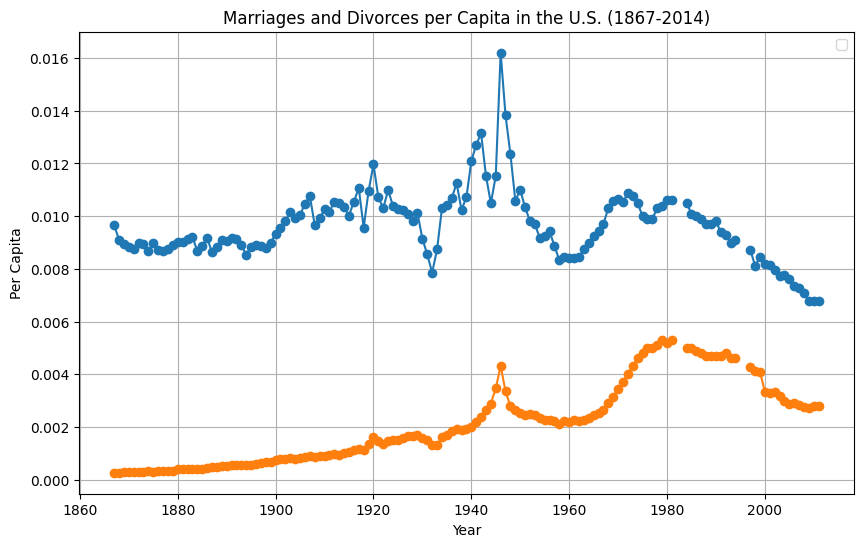

In [80]:
plt.figure(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

plt.grid(True)
plt.plot(data['Year'], data['Marriages per Capita'], label='Marriages per Capita', marker='o')
plt.plot(data['Year'], data['Divorces per Capita'], label='Divorces per Capita', marker='o')


Question 7:

In [81]:
import matplotlib.pyplot as plt

In [82]:
years = [1900, 1950, 2000]
marriages_per_capita = [9.3, 11.0, 8.2]
divorces_per_capita = [0.7, 2.5, 4.0]

<BarContainer object of 3 artists>

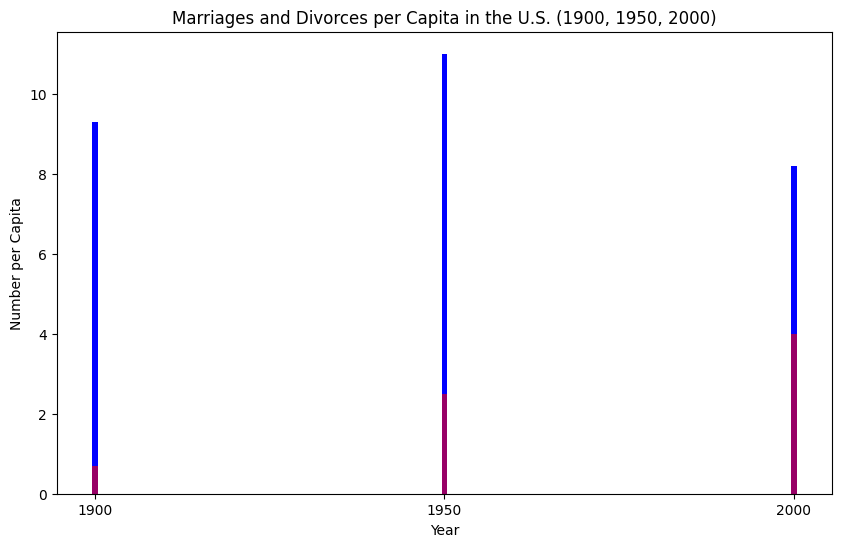

In [83]:
plt.figure(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.bar(years, marriages_per_capita, color='blue', label='Marriages per Capita')
plt.bar(years, divorces_per_capita, color='red', label='Divorces per Capita', alpha=0.6)

Question 8:

In [84]:
import matplotlib.pyplot as plt

In [85]:
data1 = pd.read_csv("AK.csv")

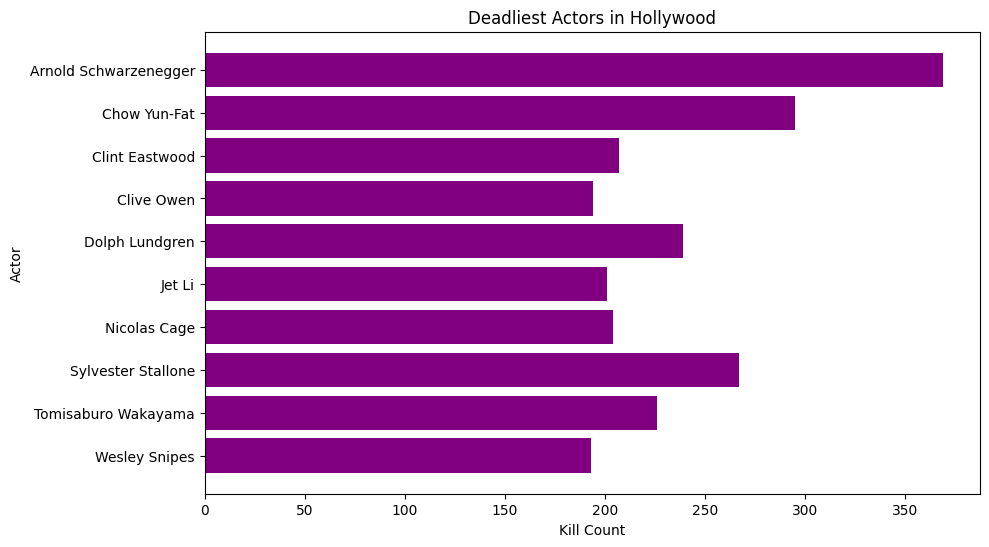

In [86]:
plt.figure(figsize=(10, 6))
plt.barh(data1["Actor"], data1["Count"], color='purple')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()

Question 9:

In [87]:
import pandas as pd

data = {'languages': [['English', 'Spanish'], ['English'], ['French', 'German', 'Italian'], ['Spanish', 'Portuguese'], ['English', 'Chinese']]}

df = pd.DataFrame(data)

df_exploded = df.explode('languages')

language_counts = df_exploded['languages'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

print("Categorized and Counted Languages:")
print(language_counts)

Categorized and Counted Languages:
     Language  Count
0     English      3
1     Spanish      2
2      French      1
3      German      1
4     Italian      1
5  Portuguese      1
6     Chinese      1


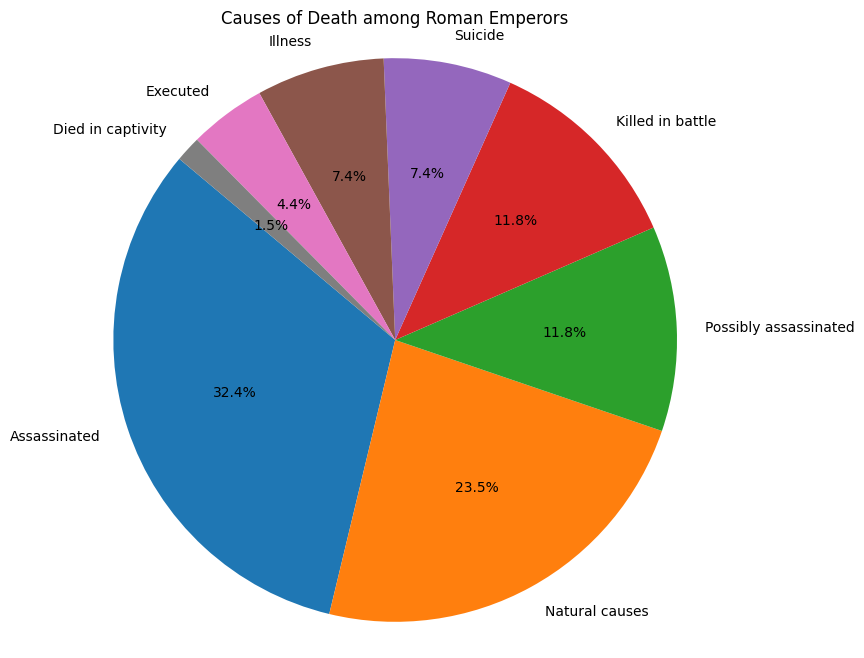

In [88]:
import matplotlib.pyplot as plt

data2 = pd.read_csv("RE.csv")

aa=data2["Cause_of_Death"].explode().value_counts().reset_index()
aa.columns=['Cause_of_Death','Counts']
plt.figure(figsize=(8, 8))
plt.pie(aa['Counts'],labels=aa['Cause_of_Death'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Causes of Death among Roman Emperors")
plt.show()

Question 10:

In [93]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
data3 = pd.read_csv("R.csv")
print(data3)

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                      1611  


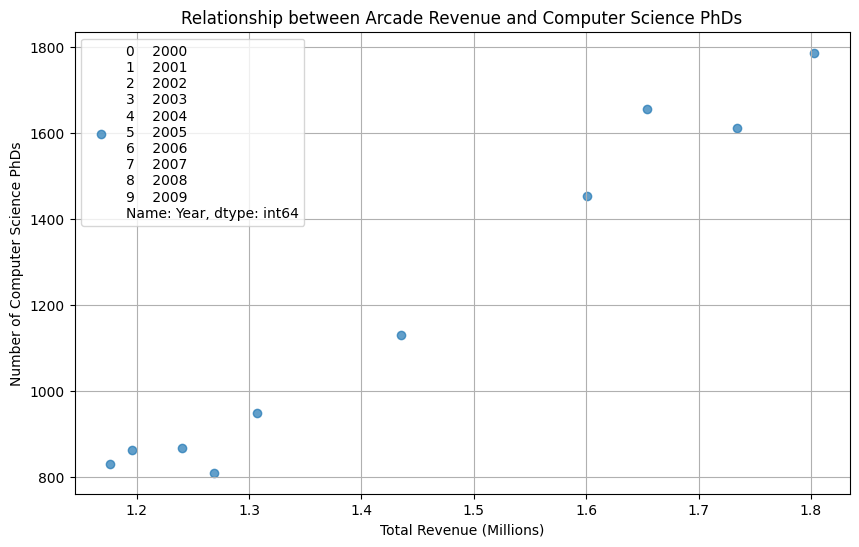

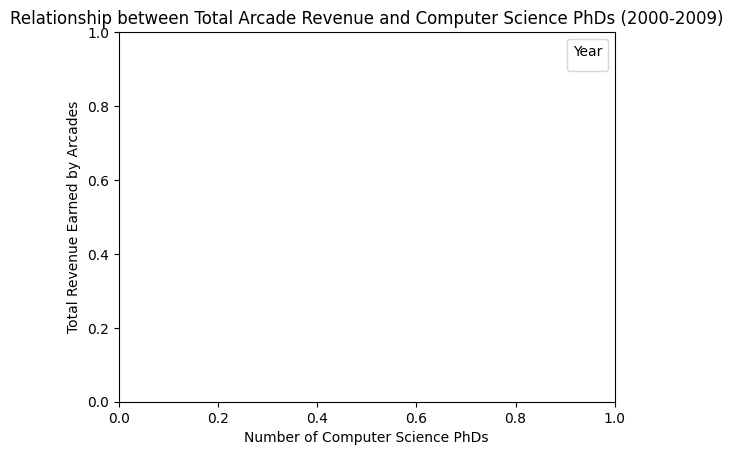

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['Total Arcade Revenue (billions)'], data3['Computer Science Doctorates Awarded (US)'], label=data3['Year'], alpha=0.7)

plt.xlabel("Total Revenue (Millions)")
plt.ylabel("Number of Computer Science PhDs")
plt.title("Relationship between Arcade Revenue and Computer Science PhDs")
plt.legend()
plt.grid(True)

plt.show()



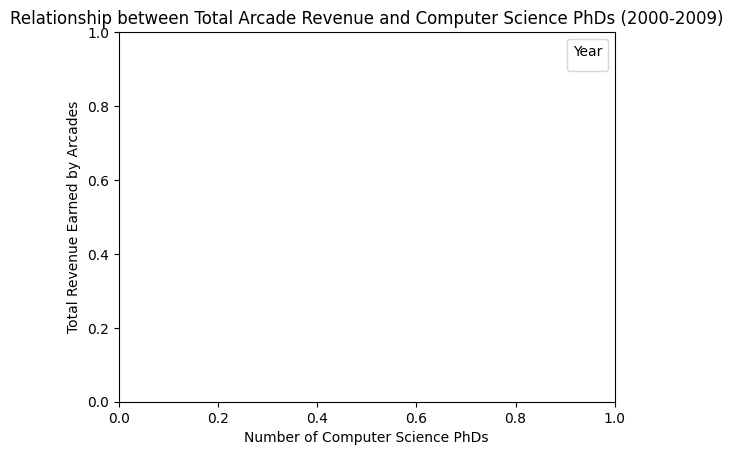

In [91]:
plt.xlabel('Number of Computer Science PhDs')
plt.ylabel('Total Revenue Earned by Arcades')
plt.title('Relationship between Total Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.legend(title='Year')